# Bangalore Hotels Dataset

# Objective:

Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 15,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This restaurants data aims at analysing demography of the location and favoritism of the Cuisines. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location.

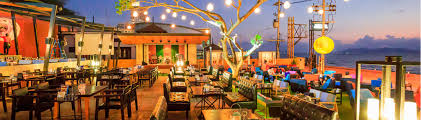

## Dataset Description

This Dataset contains the information about restaurants in bangalore to which more people/customers are interested in, which cuisines they are more interested in.

<b>Attributes Information</b>


 

Cuisine - The Type of cuisine Restaurant offers

Location - Address of the Restaurant

Name -  Names of the Restaurant/Hotel

Price -  Price of that particular dish in that Restaurant

Ratings - Ratings given by customer to restaurants out of 5

Tags - Tags by which restaurants are searched

# 1.Import libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

<b> Read the Bangalore Hotels Data

In [2]:
df=pd.read_csv("BangaloreHotels.csv")

In [3]:
df.head(10)

,cuisine,location,name,price,ratings,tags
0,South Indian,1004| 26th Main| 4th T Block| Beside HDFC Ban...,Taaza Thindi,100.0,4.9,Quick Bites
1,South Indian,Ranga Rao Road| Near Shankar Mutt| Shankarapu...,Brahmin's Coffee Bar,100.0,4.9,Quick Bites
2,"Bakery,Desserts",12th Main| 2nd Block| Rajajinagar| Bangalore,O.G. Variar & Sons,200.0,4.9,Bakery
3,Italian,960| 12th Main| HAL 2nd Stage| Indiranagar| B...,Chianti,2000.0,4.9,Casual Dining
4,Desserts,2nd Floor| Phoenix Market City| Whitefield| ...,BelgYum,400.0,4.9,Dessert Parlor
5,"American,Continental,Fast Food",4 & 16| St. Marks Road| Bangalore,Hard Rock Cafe,2500.0,4.8,"Pub,Casual Dining"
6,"North Indian,BBQ",100 Feet Road| 1st Phase| Near Jayadeva Flyov...,AB's - Absolute Barbecues,1250.0,4.8,Casual Dining
7,"Continental,North Indian,Chinese,Finger Food,A...",4th B Cross| Koramangala 5th Block| Bangalore,Biergarten,2600.0,4.8,Microbrewery
8,South Indian,13| AB Square|14th Main| Sector 5| HSR| Banga...,Arogya Ahaara,100.0,4.8,Quick Bites
9,Paan,1/1| Chakravarthy Iyengar Layout| 2nd Main| K...,The Betel Leaf Co,300.0,4.8,Paan Shop


In [4]:
df.shape

(15023, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15023 entries, 0 to 15022
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cuisine   15023 non-null  object
 1   location  15023 non-null  object
 2   name      15023 non-null  object
 3   price     15023 non-null  object
 4   ratings   15023 non-null  object
 5   tags      12017 non-null  object
dtypes: object(6)
memory usage: 704.3+ KB


<b>The dataset has 15023 rows and 6 column.<br>
Dataset has null values, all the datatypes are object.<br>


# 2.Data Cleaning and Preprocessing 

<b> 2.1 Removing the unknown string values from price <b>

In [6]:
df[df.price.str.contains("\n")]

,cuisine,location,name,price,ratings,tags
14789,Modern Indian,140 nallurahalli colony 4th cross govindaraj...,Desi food zone,<bound method Series.mean of 1 100\n2 ...,3.9,NaN
14926,"American,Fast Food",Delivery Only,Cafesta,<bound method Series.mean of 1 100\n2 ...,3.9,NaN
14927,"Ice Cream,Desserts",Delivery Only,Kreme Delight,<bound method Series.mean of 1 100\n2 ...,3.9,NaN
14928,"American,Fast Food",Delivery Only,Cafesta,<bound method Series.mean of 1 100\n2 ...,3.9,NaN
14929,"Ice Cream,Desserts",Delivery Only,Kreme Delight,<bound method Series.mean of 1 100\n2 ...,3.9,NaN
14933,"Momos,Chinese",Delivery Only,Mast Momos,<bound method Series.mean of 1 100\n2 ...,3.9,NaN
14990,North Indian,Delivery Only,Royal Spice,<bound method Series.mean of 1 100\n2 ...,3.9,NaN


In [7]:
sample = df.price.str.replace("<bound method Series.mean of 1 100\n2 ...", 'NA')

In [8]:
sample.iloc[sample[sample.str.contains("\n")].index] = np.nan

In [9]:
df.price = sample.astype(float)

In [10]:
df.ratings = df.ratings.str[:3]
df.ratings = df.ratings.astype(float)

<b> 2.2 Dealing with types <b>

In [11]:
df.dtypes

cuisine      object
location     object
name         object
price       float64
ratings     float64
tags         object
dtype: object

In [12]:
df.head()

,cuisine,location,name,price,ratings,tags
0,South Indian,1004| 26th Main| 4th T Block| Beside HDFC Ban...,Taaza Thindi,100.0,4.9,Quick Bites
1,South Indian,Ranga Rao Road| Near Shankar Mutt| Shankarapu...,Brahmin's Coffee Bar,100.0,4.9,Quick Bites
2,"Bakery,Desserts",12th Main| 2nd Block| Rajajinagar| Bangalore,O.G. Variar & Sons,200.0,4.9,Bakery
3,Italian,960| 12th Main| HAL 2nd Stage| Indiranagar| B...,Chianti,2000.0,4.9,Casual Dining
4,Desserts,2nd Floor| Phoenix Market City| Whitefield| ...,BelgYum,400.0,4.9,Dessert Parlor


In [13]:
df.cuisine.nunique ()

3292

In [14]:
df.describe()

,price,ratings
count,15016.000000,15023.000000
mean,416.290290,3.690082
std,352.465204,0.386081
min,25.000000,2.000000
25%,200.000000,3.500000
50%,300.000000,3.900000
75%,500.000000,3.900000
max,6000.000000,4.900000


<b>2.3 Dealing with Missing value<b>

In [15]:
df.isnull().sum()

cuisine        0
location       0
name           0
price          7
ratings        0
tags        3006
dtype: int64

In [16]:
df=df.dropna()

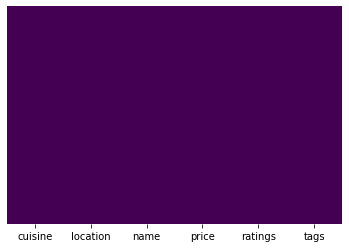

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The dataset has been cleaned and preprocessed

# 3.EDA

<b> 3.1 Most visited place to eat <b>

In [18]:
df.name.value_counts()

Kolkata Famous Kati Roll         21
Ambur Dum Biryani                14
Bangarpet Chats                  13
Sri Krishna Sagar                12
Sri Ganesh Fruit Juice Centre    11
                                 ..
Natural Kulfi & Ice Creams        1
Amazing Kati Roll's               1
Kudla - Coraltree                 1
The Republican                    1
Fruit & Chai                      1
Name: name, Length: 9668, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurant')

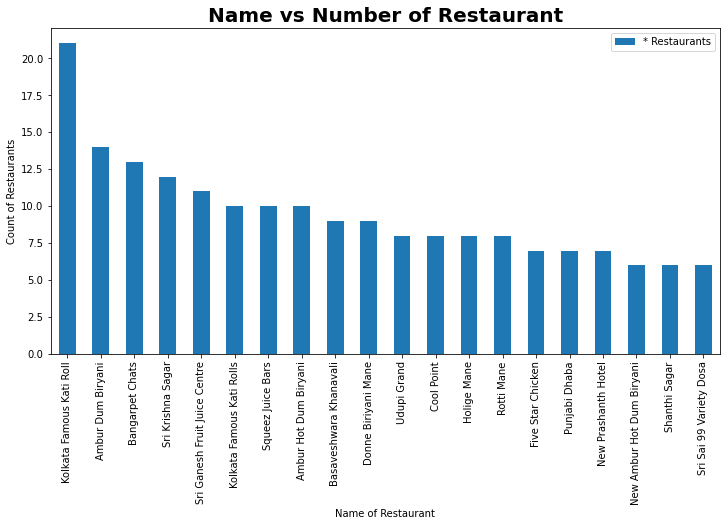

In [19]:
plt.figure(figsize = (12,6))
ax = df.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

<b>Kolkata Famous kati roll</b> has more number of Restaurants.

<b>#Top 5 cuisine

In [20]:
cuisines_data = df[df.cuisine.notnull()]
cuisines_data.cuisines = cuisines_data.cuisine.apply(lambda x:x.lower().strip())

<ipython-input-20-d101ba19dfd9>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cuisines_data.cuisines = cuisines_data.cuisine.apply(lambda x:x.lower().strip())


In [21]:
cuisines_count= []
for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

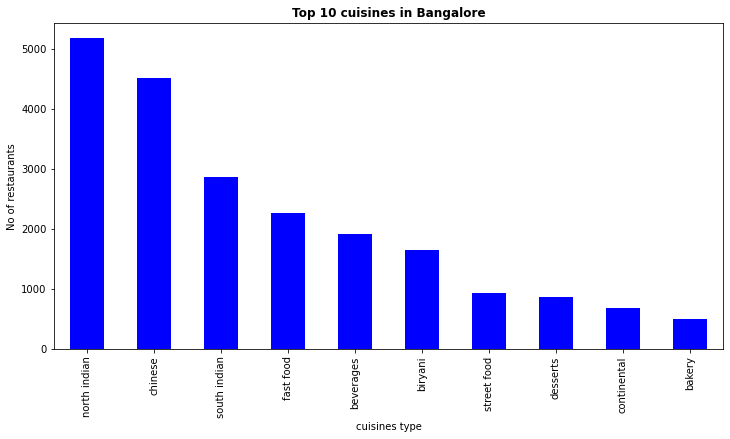

In [22]:
plt.figure(figsize=(12,6))
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'blue')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

<b>North Indian</b> is the most preferred cuisine in Banglore

<b> Top rated Restaurants</b> in Banglaore

In [23]:
ratings_view = df.ratings.value_counts().reset_index().sort_values(by= "index", ascending = False)

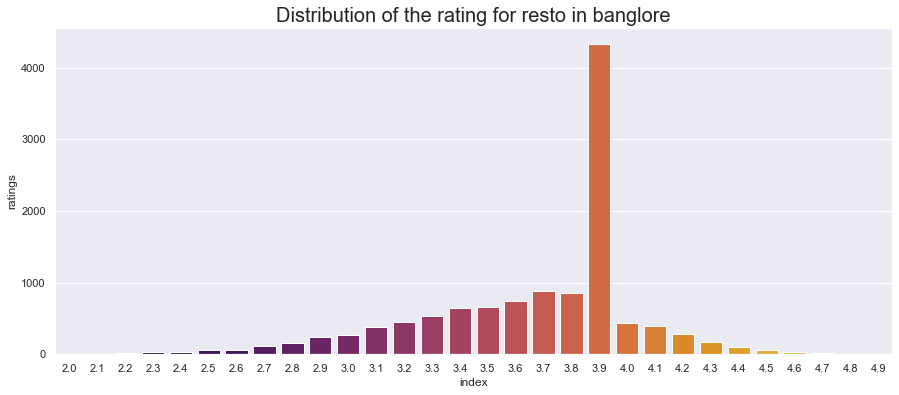

In [24]:
sns.set()
plt.figure(figsize = (15,6))
plt.title("Distribution of the rating for resto in banglore", fontdict={'fontsize':20})
sns.barplot(x=ratings_view["index"], y = ratings_view["ratings"], palette="inferno")
plt.show()

As we can clearly see, the most of the resto bears the ratings of the 3.5 to 4.0. The Most occuring one is 3.9 this denotes that the all the resto delivers the good food and gives the proper customer service in order to serve the customers

# 4.Association Rule 

Training association rule models (Apriori and ECLAT) to find the most similar cuisines eaten in bangalore.

## 4.1Apriori

Apriori algorithm uses frequent itemsets to generate association rules.Frequent Itemset is an itemset whose support value is greater than a threshold value(support).

In [25]:
df["cuisine"]

0                                  South Indian
1                                  South Indian
2                               Bakery,Desserts
3                                       Italian
4                                      Desserts
                          ...                  
15012    Chinese,North Indian,Fast Food,Biryani
15013              Ice Cream,Desserts,Beverages
15020                              North Indian
15021                      North Indian,Chinese
15022    Beverages,Juices,Sandwich,Healthy Food
Name: cuisine, Length: 12017, dtype: object

<b> Converting the Data into a Basket Format

In [26]:
data=df["cuisine"].apply(lambda x: pd.Series(str(x).split(',')))

In [27]:
data

,0,1,2,3,4,5,6,7
0,South Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bakery,Desserts,NaN,NaN,NaN,NaN,NaN,NaN
3,Italian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
15012,Chinese,North Indian,Fast Food,Biryani,NaN,NaN,NaN,NaN
15013,Ice Cream,Desserts,Beverages,NaN,NaN,NaN,NaN,NaN
15020,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15021,North Indian,Chinese,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Adding all customers into a list of lists
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, 8)])

Generate frequent itemsets that have a support value of at least 3% and confidence of 20%(this number is chosen so that you can get close enough)
Generate the rules with their corresponding support, confidence and lift.

In [66]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [67]:
results = list(rules)

In [68]:
results[2]

RelationRecord(items=frozenset({'Biryani', 'Andhra'}), support=0.017558458849962554, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Andhra'}), items_add=frozenset({'Biryani'}), confidence=0.44798301486199577, lift=3.274581441360464)])

# Support
 Support is an indication of how frequently the itemset appears in the dataset.<br>
<b>The support of X with respect to T is defined as the proportion of transactions T in the
dataset which contains the itemset X.

# Confidence
 Confidence is an indication of how often the rule has been found to be true.<br>
 The confidence value of a rule, X ---> Y , with respect to a set of transactions T, is the
proportion of the transactions that contains X which also contains Y.
 <b>Confidence is defined as:<br>
 conf(X ---> Y)=supp(X U Y)/supp (X)

# Lift
 how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is<br>
<b>The lift of a rule is defined as:<br>
lift (X ---> Y)=sup (X U Y) / sup ( X ) x sup ( Y )<br>
the ratio of the observed support to that expected if X and Y were independent.

In [69]:
lift = []
antecedants = []
consequents=[]
support=[]
confidence=[]
for i in range (0, len(results)):
    support.append(results[:len(results)][i][1])
    confidence.append(results[:len(results)][i][2][0][2])
    lift.append(results[:len(results)][i][2][0][3])
    antecedants.append(list(results[:len(results)][i][2][0][0]))
    consequents.append(list(results[:len(results)][i][2][0][1]))

In [70]:
rank = pd.DataFrame([antecedants,consequents,support,confidence,lift]).transpose()
rank.columns = ['antecedants','consequents','support','Confidence','Lift']

In [71]:
# Show top 10 higher lift scores
rank.sort_values('Lift', ascending=False)

,antecedants,consequents,support,Confidence,Lift
12,[Burger],[Sandwich],0.00416077,0.268817,15.4563
53,"[Continental, Cafe]",[Italian],0.0043272,0.468468,13.9002
72,"[Chinese, Desserts]","[North Indian, Beverages]",0.00382791,0.554217,13.8751
87,"[Continental, Cafe]","[Italian, nan]",0.00407756,0.441441,13.4299
11,[Burger],[Pizza],0.00424399,0.274194,13.34
...,...,...,...,...,...
28,[Andhra],"[Biryani, nan]",0.017392,0.443737,3.25344
33,[Burger],"[Beverages, Fast Food]",0.00349505,0.225806,3.24583
86,[Mughlai],"[North Indian, Biryani, nan]",0.00882084,0.226496,3.23638
61,[Sandwich],"[nan, Desserts]",0.00382791,0.220096,3.11897


Lift indicates the strength of a rule over the random occurrence of antecedants and consequents.Here,few rules with a high lift value,  means that it occurs more frequently than would be expected given the number of transaction and product combinations

<b>A customer who purchases <b>Burger is 15.4563 times more likely to also purchase [Sandwich]</b>

 We also find out that the customers who order <b>Chinese are 13.8751 times more likely to also order North Indian</b>
     
    
 Another one is If <b>Continental is ordered then it is 13.9002 time more likely to order Italian.

## 4.2ECLAT

The vertical approach of the ECLAT algorithm makes it a faster algorithm than the Apriori algorithm.This is an implementation of the ECLAT code by hand. It calculate the pairs that have been bought more frequently comparing to other pairs. At the end, we expect to see what is the most common combination of products

<b> Getting the list of unique cuisines ordered by all customers

In [35]:
# Putting all transactions in a single list
itens = []
for i in range(0, len(transactions)):
    itens.extend(transactions[i])

# Finding unique items from transactions and removing nan
uniqueItems = list(set(itens))
uniqueItems.remove('nan')

In [36]:
uniqueItems[:10]

['Cafe',
 'Korean',
 'Afghan',
 'Mediterranean',
 'Middle Eastern',
 'British',
 'Juices',
 'Mangalorean',
 'Greek',
 'North Eastern']

### Creating combinations with the items - pairs

In [37]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;       

In [73]:
pair[:10]

[['Cafe', 'Korean'],
 ['Cafe', 'Afghan'],
 ['Cafe', 'Mediterranean'],
 ['Cafe', 'Middle Eastern'],
 ['Cafe', 'British'],
 ['Cafe', 'Juices'],
 ['Cafe', 'Mangalorean'],
 ['Cafe', 'Greek'],
 ['Cafe', 'North Eastern'],
 ['Cafe', 'Mithai']]

### Calculating score
The calculation is done looking at the number of customers that bought both items (the pair) and divided by no. of customers(99). This calculation is done for all pairs possible and the score is returned on "score" list.

$ score = \frac{\text{number of lists that contain [item x and item y]}} {\text{number of all lists}} $

In [62]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    
    score.append(len(eval(mycode))/12017.)

Wall time: 15.6 s


<b>Top 10 Most common pairs of items

In [63]:
items_bought=list(zip(*pair))[0]
recommend=list(zip(*pair))[1]

In [64]:
ranking_ECLAT = pd.DataFrame([items_bought,recommend,score]).transpose()
ranking_ECLAT.columns = ['Items Bought','Recommended product','Score']

In [65]:
ranking_ECLAT.sort_values('Score', ascending=False)

,Items Bought,Recommended product,Score
2787,Chinese,North Indian,0.28235
1842,South Indian,North Indian,0.111925
1819,South Indian,Chinese,0.103686
3944,North Indian,Biryani,0.0704003
4523,Fast Food,Beverages,0.0695681
...,...,...,...
1662,Tex-Mex,Bar Food,0
1663,Tex-Mex,Konkan,0
1665,Tex-Mex,Andhra,0
1666,Tex-Mex,Steak,0


We can observe from both Apriori and ECLAT algorithm ,<b>Chinese and North Indian Cuisines are bought together with Confidence score of 28%</b>

# 5. Recommendations

<b>The acquired rules generated cay be used to improve the Special dishes and matching the cuisines liked by most of people to increase customer satisfaction,and consequently, to raise the restaurant’s business rate in the long run.<br>
    
The restaurants should be redesign their menu to the likes of the customer both in quantity and quality so that more and more customers can indulge in the restaurant.<br>
    

    
From the perspective of business investments the shareholder or other investors can look at the requirements of the customer and invest accordingly to the restaurant business.